In [1]:
import sys

sys.path[0] = '/bbkinghome/mbarrera/git_supply/nndp/src'

import sys
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import nndp

In [2]:
from model import u, m, F, policy, T, k_star

In [3]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
params, nn = nndp.initialize_deep_nn(subkey,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 256,
                                hidden_layers = 3,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])


def normalize_params(params:dict)->dict:
    for layer in params.keys():
        params[layer]['w'] = params[layer]['w'] / jnp.sqrt(params[layer]['w'].shape[0])
    return params

params = normalize_params(params)

In [4]:
key, subkey = jax.random.split(key)

params,result = nndp.core.train(key = subkey,
               params = params,
               nn = nn,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 200,
               batch_size = 200,
               epochs = 50,
               optimizer = optax.adam(1e-4)
               )

Objective value on training iteration 49 out of 50: 17.220354080200195

<Axes: title={'center': 'Convergence of Objective Function'}, xlabel='Epoch', ylabel='Objective Function'>

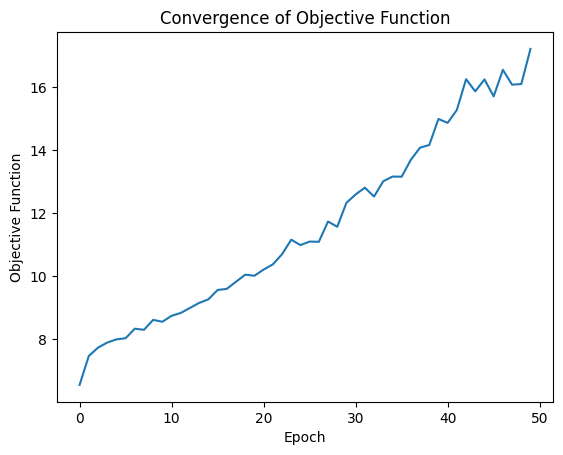

In [5]:
result.plot_convergence()

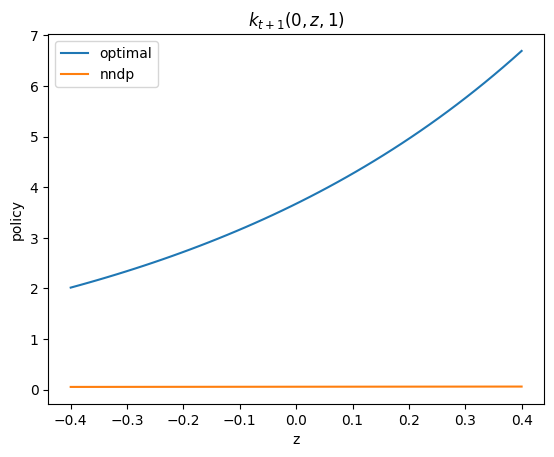

In [6]:
z = jnp.linspace(-0.4,0.4)
k = 5
t = 0
state = jnp.column_stack([jnp.ones_like(z)*t, z, jnp.ones_like(z)*k])
fig, ax = plt.subplots()
ax.plot(z, k_star(z), label='optimal')
ax.plot(z, policy(state, params, nn), label='nndp')
ax.set(xlabel='z',ylabel='policy', title='$k_{t+1}(0,z,1)$')
ax.legend()
fig.show()

In [7]:
jnp.exp(0.4)*k**(1/3)-k

Array(-2.4490156, dtype=float32, weak_type=True)

In [8]:
a(0.1), a(10)

NameError: name 'a' is not defined

In [ ]:
policy(jnp.array([[0,0.4,1]]), params, nn)

Array([[0.]], dtype=float32)

 message: Solution found.
 success: True
  status: 0
     fun: -0.7013339
       x: 0.3508536
     nit: 21
    nfev: 21

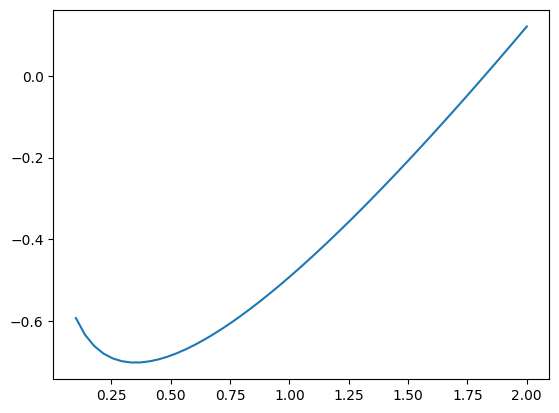

In [ ]:
from scipy.optimize import minimize_scalar
a = lambda k: -(jnp.exp(0.4)*k**(1/3)-k)
k = jnp.linspace(0.1,2)
plt.plot(k, a(k))
minimize_scalar(a, bracket=[0.1,10], bounds = [0.1,3])

In [ ]:
jnp.exp(0.4)

Array(1.4918247, dtype=float32, weak_type=True)

In [13]:
nndp.core.evaluate_policy(key,
                          policy,
                          params,
                          nn,
                          u,
                          m,
                          s0=jnp.array([[0,0,1.]]),
                          T=T,
                          N_simul=1)

Array([[1.]], dtype=float32)

In [16]:
(1/(1+0.04))**2

0.9245562130177513

In [ ]:
u(jnp.array([[0,1,0]]), jnp.array([2]))

Array([-1], dtype=int32)

In [16]:
policy(jnp.array([[0,1,0]]), params, nn)

Array([[0.]], dtype=float32)

In [9]:
policy(jnp.array([30,3,3]), params, nn)

Array([[3.4646165]], dtype=float32)